AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 5.0 		 0.63 		 0.42 |
| 5.0 		 0.04 		 0.77 |
| 5.0 		 0.81 		 0.78 |
| 5.0 		 0.93 		 0.15 |
| 5.0 		 0.39 		 0.52 |
| 5.0 		 0.36 		 0.48 |
| 5.0 		 0.05 		 0.04 |
| 5.0 		 0.53 		 0.19 |
| 5.0 		 0.59 		 0.65 |
| 5.0 		 0.14 		 0.31 |
| 5.0 		 0.66 		 0.59 |
| 5.0 		 0.81 		 0.69 |
| 5.0 		 0.92 		 0.64 |
| 5.0 		 0.77 		 0.55 |
| 5.0 		 0.74 		 0.52 |
| 5.0 		 0.95 		 0.48 |
| 5.0 		 0.85 		 0.51 |
| 5.0 		 0.61 		 0.26 |
| 5.0 		 0.57 		 0.32 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of D is: 0.26
The s.d. of R is: 0.29
-------------------------------------
The mean of M is: 5.0
The mean of D is: 0.5
The mean of R is: 0.5
-------------------------------------


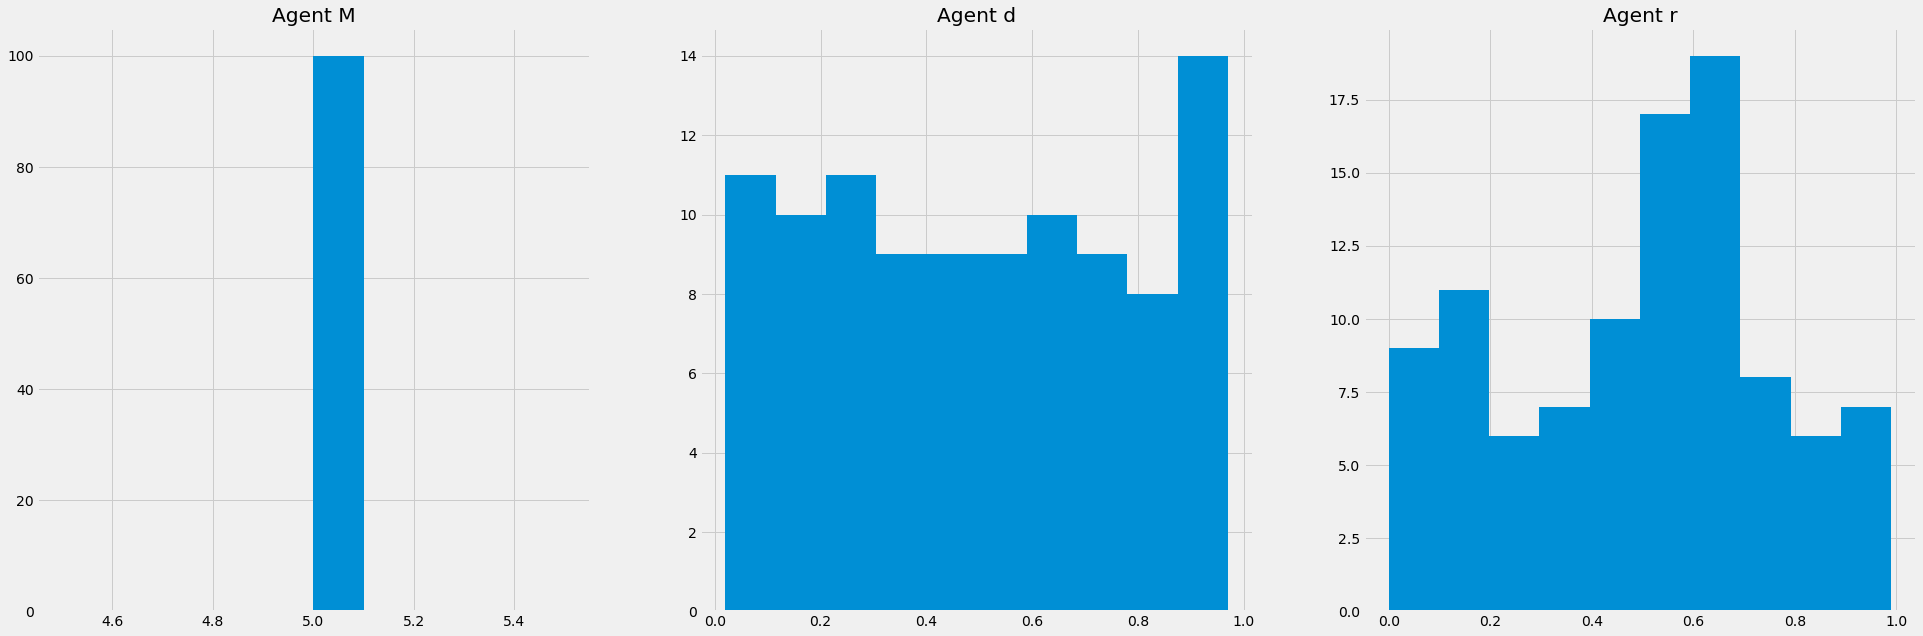

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 5.2, Temptation: 7.4, Sucker: 0, Punishment: 2.1
Agent 1 playing Agent 0: Reward: 4.1, Temptation: 7.9, Sucker: 0, Punishment: 3.8
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 5.2, Temptation: 7.4, Sucker: 0, Punishment: 2.1
Agent 2 playing Agent 0: Reward: 8.0, Temptation: 11.9, Sucker: 0, Punishment: 3.9
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 5.2, Temptation: 7.4, Sucker: 0, Punishment: 2.1
Agent 3 playing Agent 0: Reward: 5.4, Temptation: 6.2, Sucker: 0, Punishment: 0.8
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 5.2, Temptation: 7.4, Sucker: 0, Punishment: 2.1
Agent 4 playing Agent

No handles with labels found to put in legend.


    S.D.  Counts
0    0.5     258
1    0.6     256
2    0.7     236
3    0.8     212
4    0.9     198
5    1.0     184
6    1.1     181
7    1.2     171
8    1.3     132
9    1.4     126
10   1.5     106
11   1.6      82
12   1.7      68
13   1.8      68
14   1.9      44
15   2.0      27
16   2.1      29
17   2.2      15
18   2.3      13
19   2.4       7
20   2.5       5
21   2.6       4
22   2.7       1
23   2.8       2
24   2.9       1
25   3.0       0


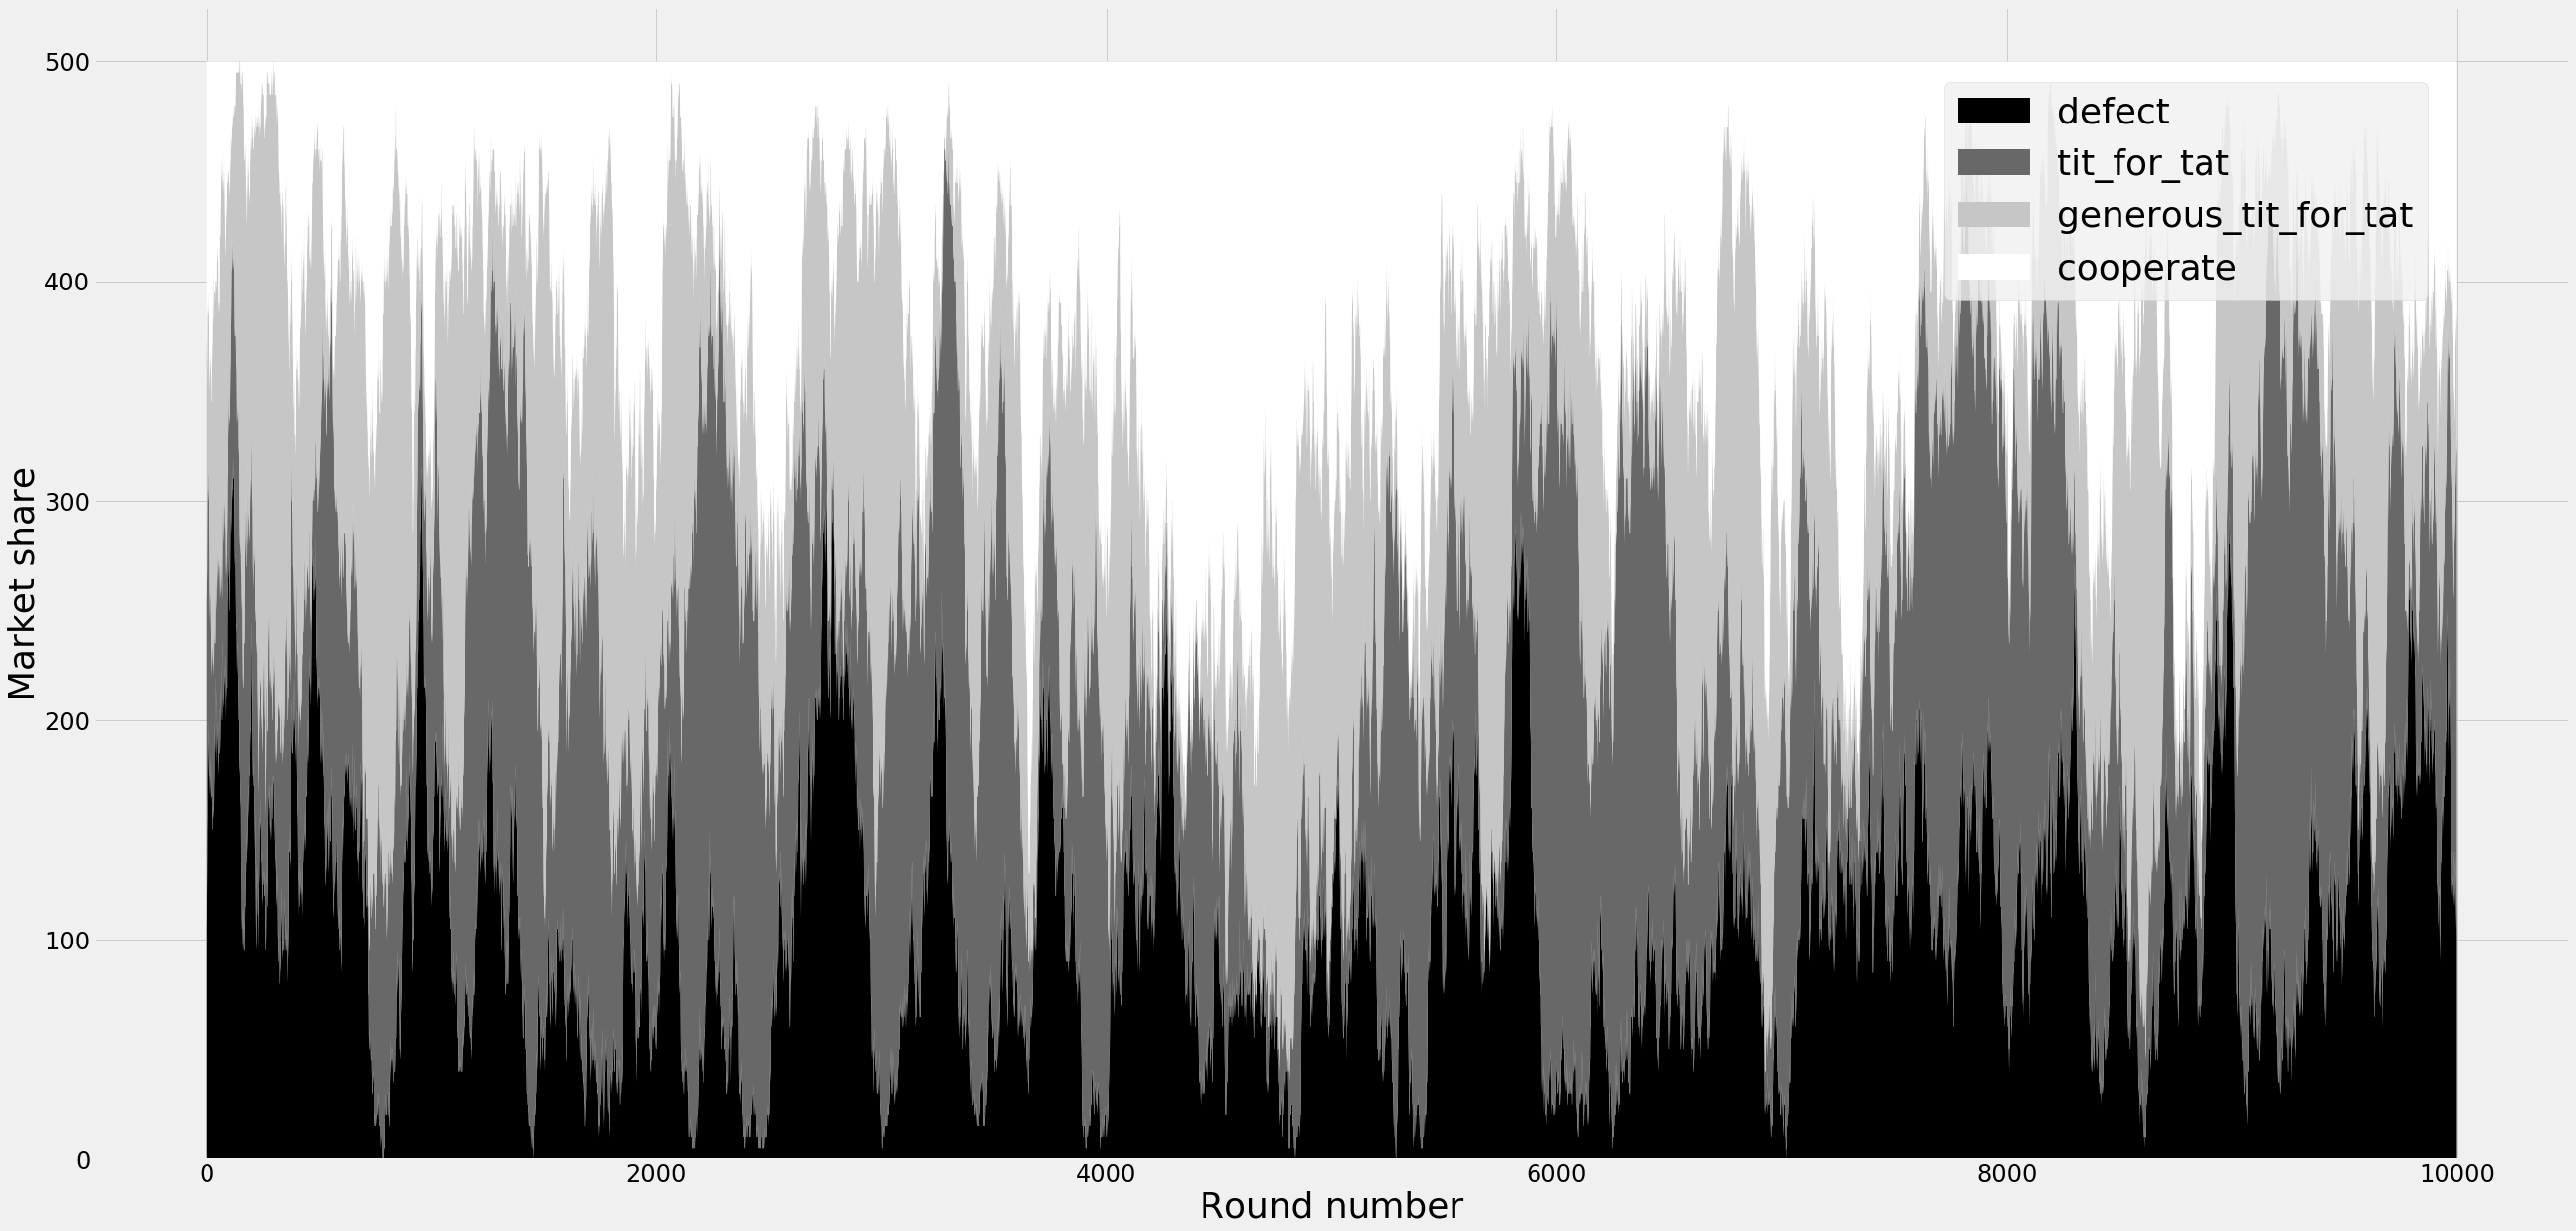

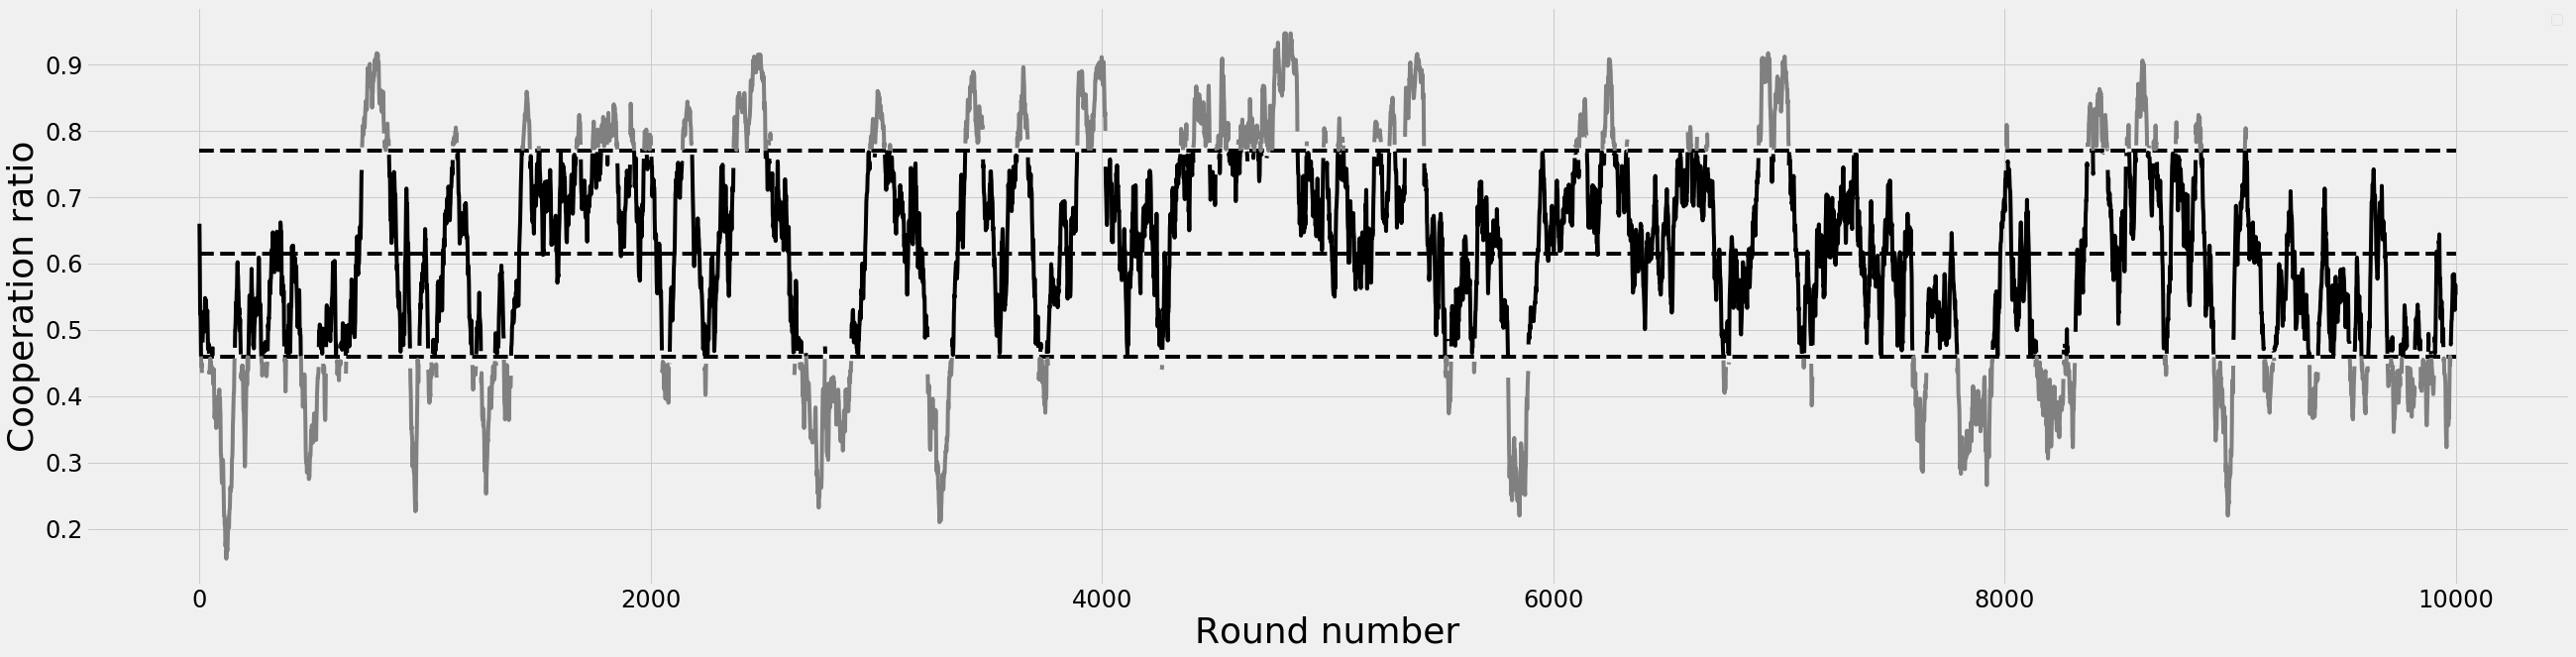

In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 16
np.random.seed(seed)

tour_type = "hetero_dr_sd_max"
M = [5, 1/10000]
R = [0.4, 1.25]
D = [0.3, 1.25]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed))